In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

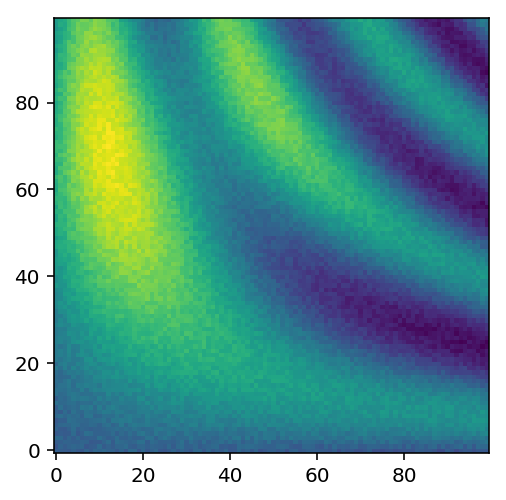

In [2]:
def black(x, y):
    s = np.sin(x*y*0.002)
    g = np.exp(-(x-20)**2/2000 -(y-70)**2/2000)*2
    return s+g+np.random.random(x.shape)/3

yy, xx = np.mgrid[0:100, 0:100]
zz = black(xx, yy)

plt.imshow(zz, origin=[0,0])

In [4]:
optimizer = BayesianOptimization(
    f=black,
    pbounds={'x': (0, 100), 'y': (0, 100)},
    verbose=2,
    random_state=30)

utility = UtilityFunction(kind="ucb", kappa=50., xi=0.1)
past_points = []

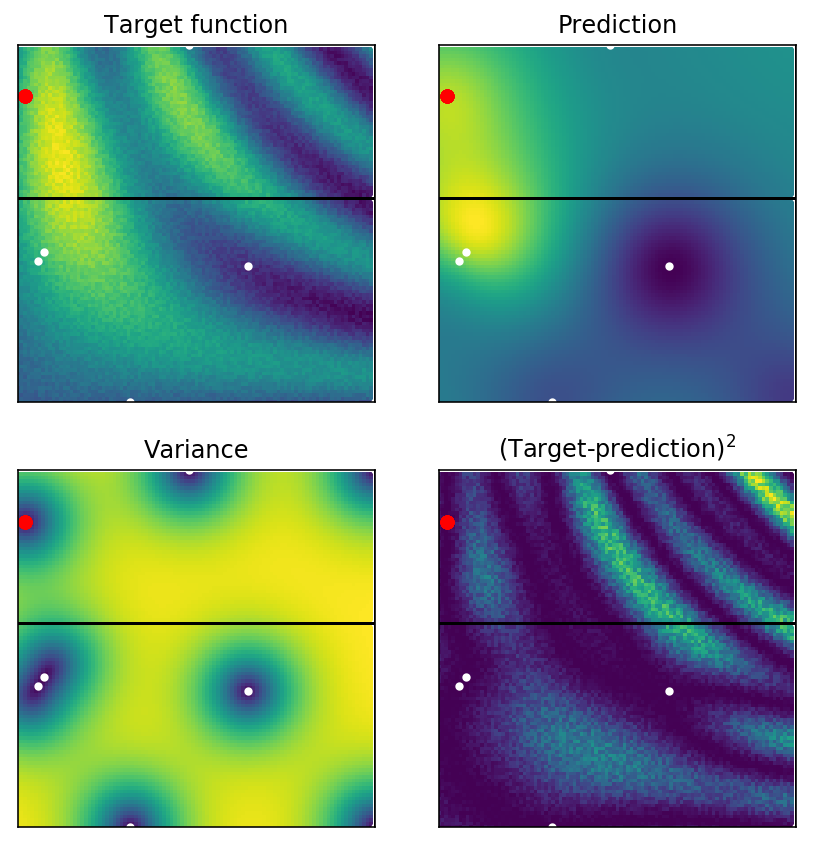

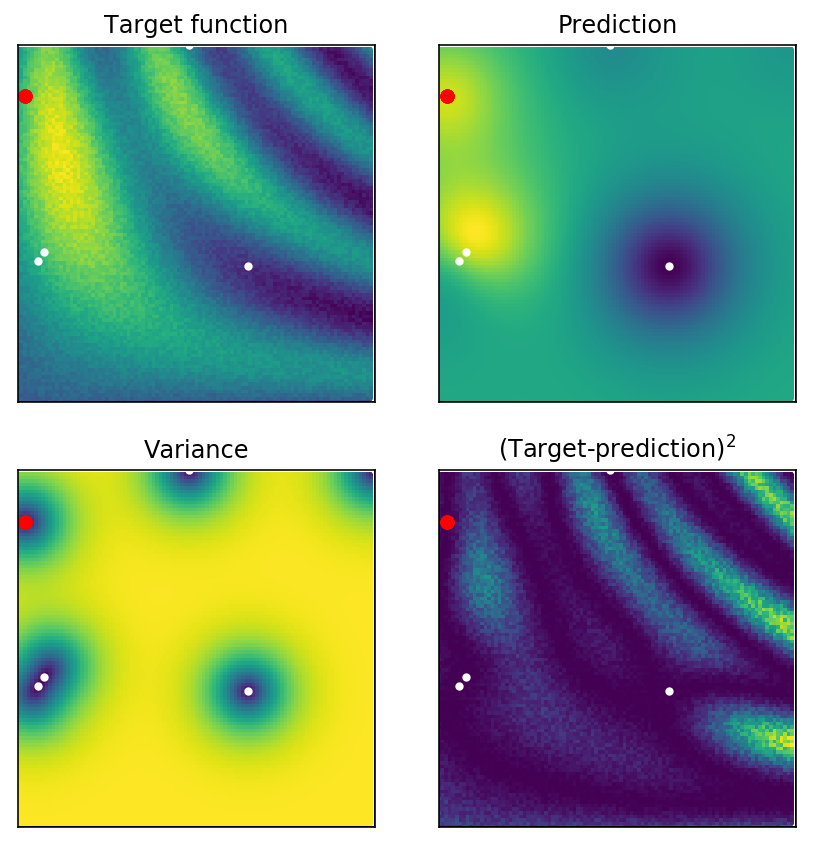

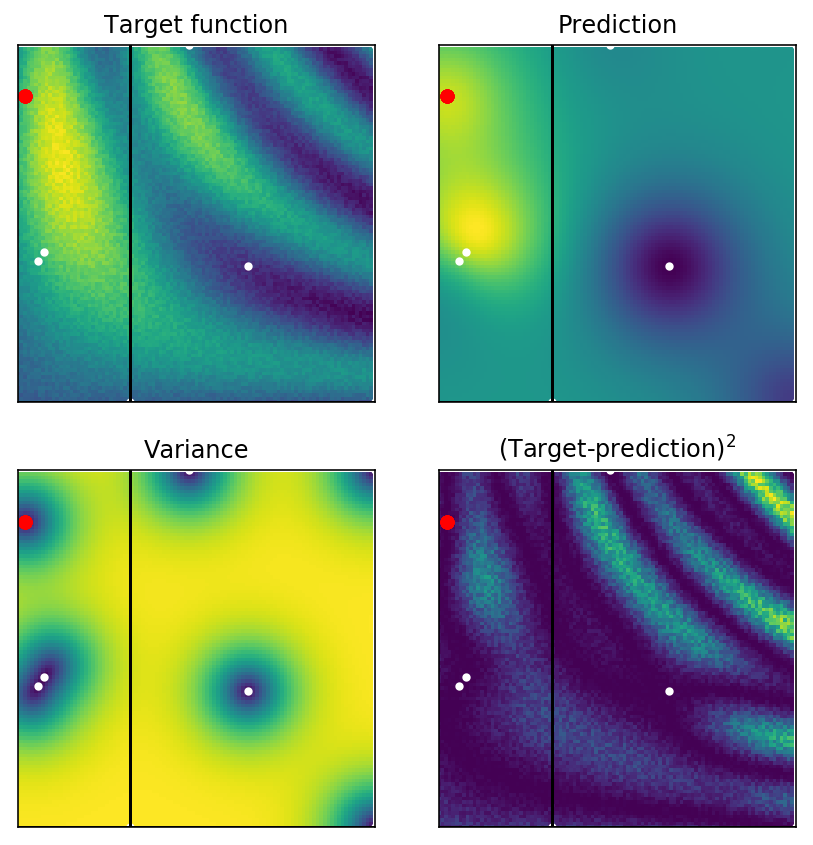

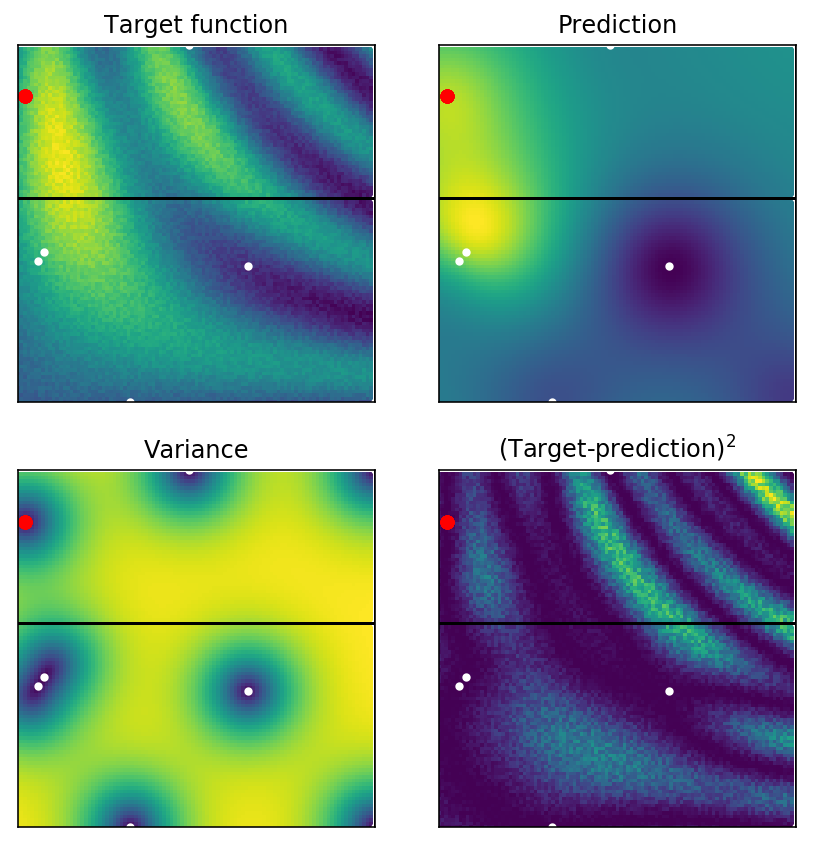

In [26]:
for _ in range(3):
    fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(6,6))
    next_point_to_probe = optimizer.suggest(utility)
    past_points.append(next_point_to_probe)

    target = black(**next_point_to_probe)
    optimizer.register(params=next_point_to_probe, target=target)

    x, y = optimizer.max['params']['x'], optimizer.max['params']['y']
    mean, sigma = optimizer._gp.predict(np.array([xx, yy]).T.reshape(-1, 2) , return_std=True)
    
    ax1.imshow(zz, origin=[0,0])
    ax1.set_title('Target function')
    
    ax2.set_title('Prediction')
    ax2.imshow(mean.reshape(100, 100).T, origin=[0,0])
    
    ax3.set_title('Variance')
    ax3.imshow(sigma.reshape(100, 100).T, origin=[0,0])
    
    ax4.set_title('(Target-prediction)$^2$')
    ax4.imshow((zz-mean.reshape(100, 100).T)**2, origin=[0,0])

    for point in past_points:
        for ax in (ax1, ax2, ax3, ax4):
            ax.scatter(point['x'], point['y'], color='white', s=10)
            ax.set_xlim(0, 100)
            ax.set_ylim(0, 100)
            ax.scatter(x, y, color='red')
            ax.hlines(next_point_to_probe['y'], 0, 100)
            ax.vlines(next_point_to_probe['x'], 0, 100)
            ax.set_xticks([])
            ax.set_yticks([])

    plt.tight_layout()
    display.clear_output(wait=True)
    display.display(plt.gcf())
    